Dataset: International Airline Passengers

Model: SARIMA

Type: Univariate

In [1]:
# load packages
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# load the original dataset again
df = pd.read_csv('..\..\datasets\AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True) 

In [6]:
df.tail(5)

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [10]:
train_size = int(len(df) * 0.66)
test_size = len(df) - train_size
train, test = df[0:train_size], df[train_size:len(df)]
print(len(train), len(test))
test.shape

95 49


(49, 1)

SARIMA $(p, q, d) (P, Q, D)m$

In **SARIMA(P, Q, D)m**: **m** is the seasonal factor. It’s the number of time steps for a single seasonal period.

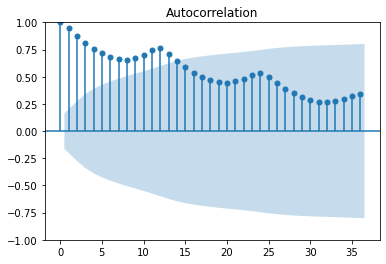

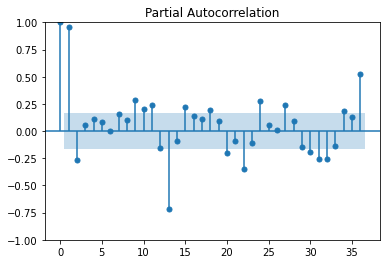

In [5]:
# reporducing the aucorrelation and partial autcorrelations functions
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plot_acf(df['#Passengers'], lags=36) 
plt.show()

plot_pacf(df['#Passengers'], lags=36) 
plt.show()

### Auto ARIMA to estimate best model ( (𝑝,𝑞,𝑑)(𝑃,𝑄,𝐷)𝑚 )

In [7]:
from pmdarima.arima import auto_arima

arima_model = auto_arima(df['#Passengers'], start_p = 1, d=1, start_q = 1, 
                          max_p = 5, max_q = 5, max_d=5, m = 12, 
                          start_P = 0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
                          seasonal = True, 
                          trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True, n_fits=50)  

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.08 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.12 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.21 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1020.582, Time=0.41 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.77 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.23 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=2.62 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.14 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.26 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.32 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.21 sec
 ARIMA(0,1,1)(1,1,0)[12]     

In [8]:
print(arima_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Wed, 25 Jan 2023   AIC                           1019.178
Time:                                     05:06:56   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      

In [11]:
# Build the model on your training set
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train,  
                order = (0, 1, 1),  
                seasonal_order =(2, 1, 1, 12)) 
  
my_model = model.fit() 
my_model.summary() 

C:\Users\kamon\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kamon\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                   95
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -300.268
Date:                            Wed, 25 Jan 2023   AIC                            610.536
Time:                                    05:08:33   BIC                            622.570
Sample:                                01-01-1949   HQIC                           615.368
                                     - 11-01-1956                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3189      0.102     -3.111      0.002      -0.520      -0.118
ar.S.L12       0.6850      0.624      1.098      0.272      -0.537       1.907
ar.S.L24       0.3139      0.133      2.353      0.019       0.052       0.575
ma.S.L12      -0.9823      6.021     -0.163      0.870     -12.783      10.818
sigma2        78.5891    424.179      0.185      0.853    -752.787     909.966
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.55
Prob(Q):                              0.96   Prob(JB):                         0.28
Heteroskedasticity (H):               1.68   Skew:                             0.42
Prob(H) (two-sided):                  0.18   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Evaluate the chosen model

In [12]:
#Train prediction
start_index = 0
end_index = len(train)-1
train_prediction = my_model.predict(start_index, end_index) 

#Prediction
start_index = len(train)
end_index = len(df)-1
prediction = my_model.predict(start_index, end_index).rename('Predicted passengers') 
#Rename the column

<AxesSubplot:xlabel='Month'>

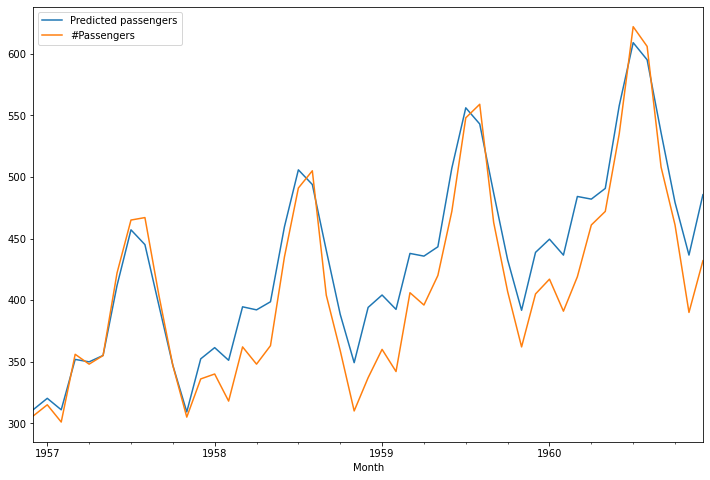

In [13]:
# plot predictions and actual values 
plt.figure(figsize=(12,8))
prediction.plot(legend = True) 
test['#Passengers'].plot(legend = True) 

In [14]:
import math
from sklearn.metrics import mean_squared_error

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(train, train_prediction))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(test, prediction))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 16.14 RMSE
Test Score: 29.45 RMSE


In [15]:
from sklearn.metrics import r2_score
score = r2_score(test, prediction)
print("R2 score is: ", score)

R2 score is:  0.8587840365883558


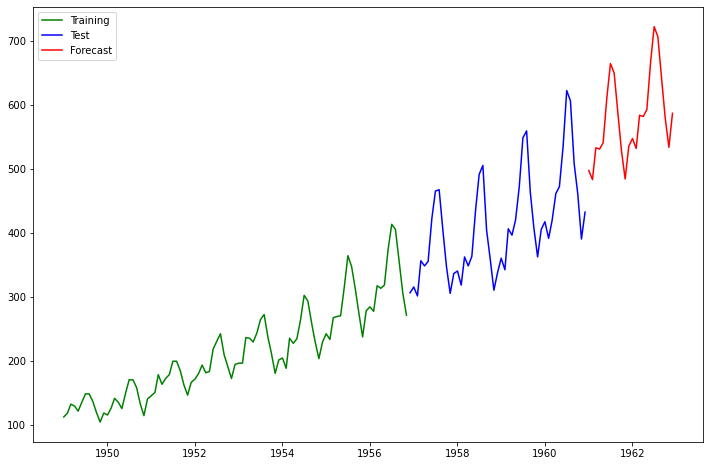

In [17]:
# Forecast for the next 2 years 
forecast = my_model.predict(start = len(df),  
                          end = (len(df)-1) + 2 * 12,  
                          typ = 'levels').rename('Forecast') 
  
plt.figure(figsize=(12,8))
plt.plot(train, label='Training', color='green')
plt.plot(test, label='Test', color='blue')
plt.plot(forecast, label='Forecast', color='red')
plt.legend(loc='upper left')
plt.show()

Notice: This is a practice of time series forecasting on the SARIMA model. Some code chunks are the adapted ones. Credits to original author.